In [72]:
%matplotlib inline


# Solving Blackjack with Q-Learning


<img src="file://_static/img/tutorials/blackjack_AE_loop.jpg" width="650" alt="agent-environment-diagram" class="only-light">
<img src="file://_static/img/tutorials/blackjack_AE_loop_dark.png" width="650" alt="agent-environment-diagram" class="only-dark">

In this tutorial, we’ll explore and solve the *Blackjack-v1*
environment.

**Blackjack** is one of the most popular casino card games that is also
infamous for being beatable under certain conditions. This version of
the game uses an infinite deck (we draw the cards with replacement), so
counting cards won’t be a viable strategy in our simulated game.
Full documentation can be found at https://gymnasium.farama.org/environments/toy_text/blackjack

**Objective**: To win, your card sum should be greater than the
dealers without exceeding 21.

**Actions**: Agents can pick between two actions:
 - stand (0): the player takes no more cards
 - hit (1): the player will be given another card, however the player could get over 21 and bust

**Approach**: To solve this environment by yourself, you can pick your
favorite discrete RL algorithm. The presented solution uses *Q-learning*
(a model-free RL algorithm).




## Imports and Environment Setup




In [73]:
# Author: Till Zemann
# License: MIT License

from __future__ import annotations

from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Patch
from tqdm import tqdm
import random
import os

import gymnasium as gym

from blackjack import ControlType, BlackJackAgent
from visualize import reward_plot, training_plot, create_grids, create_plots


# Let's start by creating the blackjack environment.
# Note: We are going to follow the rules from Sutton & Barto.
# Other versions of the game can be found below for you to experiment.

env = gym.make("Blackjack-v1", sab=False, natural=True)

.. code:: py

  # Other possible environment configurations are:

  env = gym.make('Blackjack-v1', natural=True, sab=False)
  # Whether to give an additional reward for starting with a natural blackjack, i.e. starting with an ace and ten (sum is 21).

  env = gym.make('Blackjack-v1', natural=False, sab=False)
  # Whether to follow the exact rules outlined in the book by Sutton and Barto. If `sab` is `True`, the keyword argument `natural` will be ignored.




## Observing the environment

First of all, we call ``env.reset()`` to start an episode. This function
resets the environment to a starting position and returns an initial
``observation``. We usually also set ``done = False``. This variable
will be useful later to check if a game is terminated (i.e., the player wins or loses).




In [74]:
# reset the environment to get the first observation
done = False
observation, info = env.reset()

# observation = (16, 9, False)

Note that our observation is a 3-tuple consisting of 3 values:

-  The players current sum
-  Value of the dealers face-up card
-  Boolean whether the player holds a usable ace (An ace is usable if it
   counts as 11 without busting)




## Executing an action

After receiving our first observation, we are only going to use the
``env.step(action)`` function to interact with the environment. This
function takes an action as input and executes it in the environment.
Because that action changes the state of the environment, it returns
four useful variables to us. These are:

-  ``next_state``: This is the observation that the agent will receive
   after taking the action.
-  ``reward``: This is the reward that the agent will receive after
   taking the action.
-  ``terminated``: This is a boolean variable that indicates whether or
   not the environment has terminated.
-  ``truncated``: This is a boolean variable that also indicates whether
   the episode ended by early truncation, i.e., a time limit is reached.
-  ``info``: This is a dictionary that might contain additional
   information about the environment.

The ``next_state``, ``reward``,  ``terminated`` and ``truncated`` variables are
self-explanatory, but the ``info`` variable requires some additional
explanation. This variable contains a dictionary that might have some
extra information about the environment, but in the Blackjack-v1
environment you can ignore it. For example in Atari environments the
info dictionary has a ``ale.lives`` key that tells us how many lives the
agent has left. If the agent has 0 lives, then the episode is over.

Note that it is not a good idea to call ``env.render()`` in your training
loop because rendering slows down training by a lot. Rather try to build
an extra loop to evaluate and showcase the agent after training.




In [75]:
# sample a random action from all valid actions
action = env.action_space.sample()
# action=1

# execute the action in our environment and receive infos from the environment
observation, reward, terminated, truncated, info = env.step(action)

# observation=(24, 10, False)
# reward=-1.0
# terminated=True
# truncated=False
# info={}

In [76]:
print(observation)

(5, 3, 0)


In [77]:
print(reward)

-1.0


In [78]:
def Reward_compare_plot(MC_Culmulative_Return_np, MC_reward_moving_average, SARSA_Culmulative_Return_np, SARSA_reward_moving_average, Q_Learning_Culmulative_Return_np, Q_Learning_reward_moving_average):

    fig, axs = plt.subplots(ncols=3, figsize=(20, 8))
    axs[0].set_title("Cumulative return Plot")
    axs[0].set_xlabel('Iteration')
    axs[0].set_ylabel('Cumulative return')
    axs[0].plot(range(len(MC_Culmulative_Return_np)), MC_Culmulative_Return_np)
    axs[0].plot(range(len(SARSA_Culmulative_Return_np)), SARSA_Culmulative_Return_np)
    axs[0].plot(range(len(SARSA_Culmulative_Return_np)), SARSA_Culmulative_Return_np)
    axs[0].grid(True)

    axs[1].plot(range(len(reward_moving_average)), reward_moving_average)
    axs[1].grid(True)
    axs[1].set_xlabel('Iteration')
    axs[1].set_ylabel('Filter Return')

Once ``terminated = True`` or ``truncated=True``, we should stop the
current episode and begin a new one with ``env.reset()``. If you
continue executing actions without resetting the environment, it still
responds but the output won’t be useful for training (it might even be
harmful if the agent learns on invalid data).




## Building an agent

Let’s build a ``Q-learning agent`` to solve *Blackjack-v1*! We’ll need
some functions for picking an action and updating the agents action
values. To ensure that the agents explores the environment, one possible
solution is the ``epsilon-greedy`` strategy, where we pick a random
action with the percentage ``epsilon`` and the greedy action (currently
valued as the best) ``1 - epsilon``.




To train the agent, we will let the agent play one episode (one complete
game is called an episode) at a time and then update it’s Q-values after
each episode. The agent will have to experience a lot of episodes to
explore the environment sufficiently.

Now we should be ready to build the training loop.




Great, let’s train!

Info: The current hyperparameters are set to quickly train a decent agent.
If you want to converge to the optimal policy, try increasing
the n_episodes by 10x and lower the learning_rate (e.g. to 0.001).




## Training Algorithm with 100000 training iterations 

## Visualizing the training with Q-Learning Algorithm

## Testing Algorithm Performance After 100000 iterations training

## Visualizing the testing with Q-Learning Algorithm




<img src="file://_static/img/tutorials/blackjack_training_plots.png">




## Visualising the policy



<img src="file://_static/img/tutorials/blackjack_with_usable_ace.png">




<img src="file://_static/img/tutorials/blackjack_without_usable_ace.png">

It's good practice to call env.close() at the end of your script,
so that any used resources by the environment will be closed.




## Think you can do better?



In [79]:
# You can visualize the environment using the play function
# and try to win a few games.

Hopefully this Tutorial helped you get a grip of how to interact with
OpenAI-Gym environments and sets you on a journey to solve many more RL
challenges.

It is recommended that you solve this environment by yourself (project
based learning is really effective!). You can apply your favorite
discrete RL algorithm or give Monte Carlo ES a try (covered in [Sutton &
Barto](http://incompleteideas.net/book/the-book-2nd.html), section
5.3) - this way you can compare your results directly to the book.

Best of fun!




# MC Control

## Parameters Studies for MC Algorithm

Discount 

In [80]:
#Discount Hyper Paramter Studied
Expected_Return_ls = []
discount_step = 0.01
discount_ls = np.arange(0,1,discount_step)

for i in  discount_ls:
    # hyperparameters
    learning_rate = 0.01
    n_episodes = 10000
    start_epsilon = 1.0
    epsilon_decay = start_epsilon / (n_episodes / 2)  # reduce the exploration over time
    final_epsilon = 0.01
    discount = i

    control_type = ControlType.MONTE_CARLO

    agent = BlackJackAgent(
        control_type=control_type,
        learning_rate=learning_rate,
        initial_epsilon=start_epsilon,
        epsilon_decay=epsilon_decay,
        final_epsilon=final_epsilon,
        discount_factor=discount
    )

    env = gym.make("Blackjack-v1", sab=False, natural=True)

    env.observation_space.seed(20)
    np.random.seed(20)

    Expected_Return = 0
    count = 1

    env = gym.wrappers.RecordEpisodeStatistics(env, deque_size=n_episodes)
    for episode in tqdm(range(n_episodes)):
        obs, info = env.reset()
        done = False

        history_ls = []

        # play one episode
        while not done:
            action = agent.get_action(obs)
            next_obs, reward, terminated, truncated, info = env.step(action)
            agent.update(
                obs=obs,
                action=action,
                reward=reward,
                terminated=terminated
            )
        
            # update if the environment is done and the current obs
            done = terminated or truncated
            obs = next_obs

        agent.decay_epsilon()

    Expected_Return = (np.array(env.return_queue).flatten().sum())/len(np.array(env.return_queue).flatten())
    Expected_Return_ls.append(Expected_Return)

# Generating x values
x = np.arange(len(Expected_Return_ls))

# Performing polynomial fit
degree = 1  # Adjust the degree of the polynomial as needed
coefficients = np.polyfit(x, Expected_Return_ls, degree)
polynomial = np.poly1d(coefficients)

# Generating y values for the polynomial
y_fit = polynomial(x)

plt.plot(Expected_Return_ls)
plt.plot(x, y_fit, label='Polynomial Fit')
plt.xlabel('Discount (Step:0.01)')
plt.ylabel('Average Expected Return')
plt.title('Discount studies with step {} on MC Algorithm'.format(discount_step))
plt.grid(True)
plt.show()
    

 27%|██▋       | 2707/10000 [00:00<00:01, 4987.95it/s]


KeyboardInterrupt: 

Epsilon

 23%|██▎       | 2340/10000 [00:00<00:01, 4792.69it/s]

100%|██████████| 10000/10000 [00:02<00:00, 4906.57it/s]


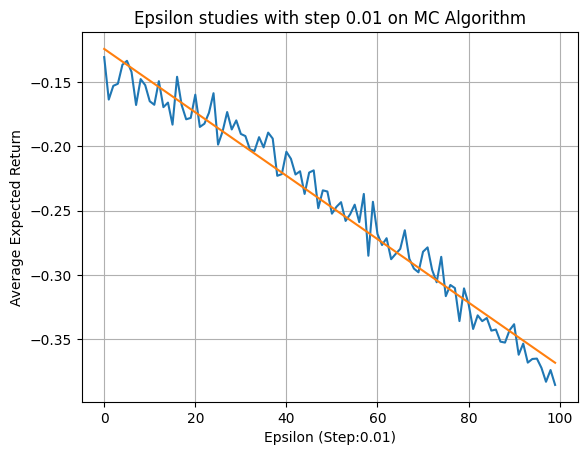

In [ ]:
#Epsilon Hyper Paramter Studied
Expected_Return_ls = []
epsilon_step = 0.01
epsilon_ls = np.arange(0,1,discount_step)

for i in  epsilon_ls:
    # hyperparameters
    learning_rate = 0.01
    n_episodes = 10000
    start_epsilon = 1.0
    epsilon_decay = start_epsilon / (n_episodes / 2)  # reduce the exploration over time
    final_epsilon = i

    discount = 0.01

    control_type = ControlType.MONTE_CARLO

    agent = BlackJackAgent(
        control_type=control_type,
        learning_rate=learning_rate,
        initial_epsilon=start_epsilon,
        epsilon_decay=epsilon_decay,
        final_epsilon=final_epsilon,
        discount_factor=discount
    )

    env = gym.make("Blackjack-v1", sab=False, natural=True)

    env.observation_space.seed(20)
    np.random.seed(20)

    Expected_Return = 0
    count = 1

    env = gym.wrappers.RecordEpisodeStatistics(env, deque_size=n_episodes)
    for episode in tqdm(range(n_episodes)):
        obs, info = env.reset()
        done = False

        history_ls = []

        # play one episode
        while not done:
            action = agent.get_action(obs)
            next_obs, reward, terminated, truncated, info = env.step(action)
            agent.update(
                obs=obs,
                action=action,
                reward=reward,
                terminated=terminated
            )
        
            # update if the environment is done and the current obs
            done = terminated or truncated
            obs = next_obs

        agent.decay_epsilon()

    Expected_Return = (np.array(env.return_queue).flatten().sum())/len(np.array(env.return_queue).flatten())
    Expected_Return_ls.append(Expected_Return)

# Generating x values
x = np.arange(len(Expected_Return_ls))

# Performing polynomial fit
degree = 1  # Adjust the degree of the polynomial as needed
coefficients = np.polyfit(x, Expected_Return_ls, degree)
polynomial = np.poly1d(coefficients)

# Generating y values for the polynomial
y_fit = polynomial(x)

plt.plot(Expected_Return_ls)
plt.plot(x, y_fit, label='Polynomial Fit')
plt.xlabel('Epsilon (Step:0.01)')
plt.ylabel('Average Expected Return')
plt.title('Epsilon studies with step {} on MC Algorithm'.format(epsilon_step))
plt.grid(True)
plt.show()

## Training Algorithm with 100000 training iterations 

In [81]:
#Training MC

# hyperparameters
learning_rate = 0.01
n_episodes = 100000
start_epsilon = 1.0
epsilon_decay = start_epsilon / (n_episodes / 2)  # reduce the exploration over time
final_epsilon = 0.001
discount = 0.01

control_type = ControlType.MONTE_CARLO

agent = BlackJackAgent(
    control_type=control_type,
    learning_rate=learning_rate,
    initial_epsilon=start_epsilon,
    epsilon_decay=epsilon_decay,
    final_epsilon=final_epsilon,
    discount_factor=discount
)

env = gym.make("Blackjack-v1", sab=False, natural=True)

Expected_Return = 0
count = 1

env = gym.wrappers.RecordEpisodeStatistics(env, deque_size=n_episodes)
for episode in tqdm(range(n_episodes)):
    obs, info = env.reset()
    done = False

    # play one episode
    while not done:
        action = agent.get_action(obs)
        next_obs, reward, terminated, truncated, info = env.step(action)
        agent.update(
            obs=obs,
            action=action,
            reward=reward,
            terminated=terminated
        )

        # update if the environment is done and the current obs
        done = terminated or truncated
        obs = next_obs

    agent.decay_epsilon()

Expected_Return = (np.array(env.return_queue).flatten().sum())/len(np.array(env.return_queue).flatten())
Expected_Return_ls.append(Expected_Return)

100%|██████████| 100000/100000 [00:24<00:00, 4013.54it/s]


Save Agent

In [ ]:
#Save MC agent
q_value_file = "monte_carlo.json"
full_path = os.path.abspath("q_value")
agent.save_model(full_path, q_value_file)

## Visualizing the training with MC Algorithm

====================== Reward Frequency ======================

Iteration[0:10000]     positive:0.2715 negative:0.6577
Iteration[10000:20000]     positive:0.2965 negative:0.6219
Iteration[20000:30000]     positive:0.3297 negative:0.5731
Iteration[30000:40000]     positive:0.3357 negative:0.5588
Iteration[40000:50000]     positive:0.3705 negative:0.4977
Iteration[50000:60000]     positive:0.3879 negative:0.4769
Iteration[60000:70000]     positive:0.3827 negative:0.4911
Iteration[70000:80000]     positive:0.3879 negative:0.4781
Iteration[80000:90000]     positive:0.3865 negative:0.4791
Iteration[90000:100000]     positive:0.3861 negative:0.4804

====================== Reward Frequency ======================


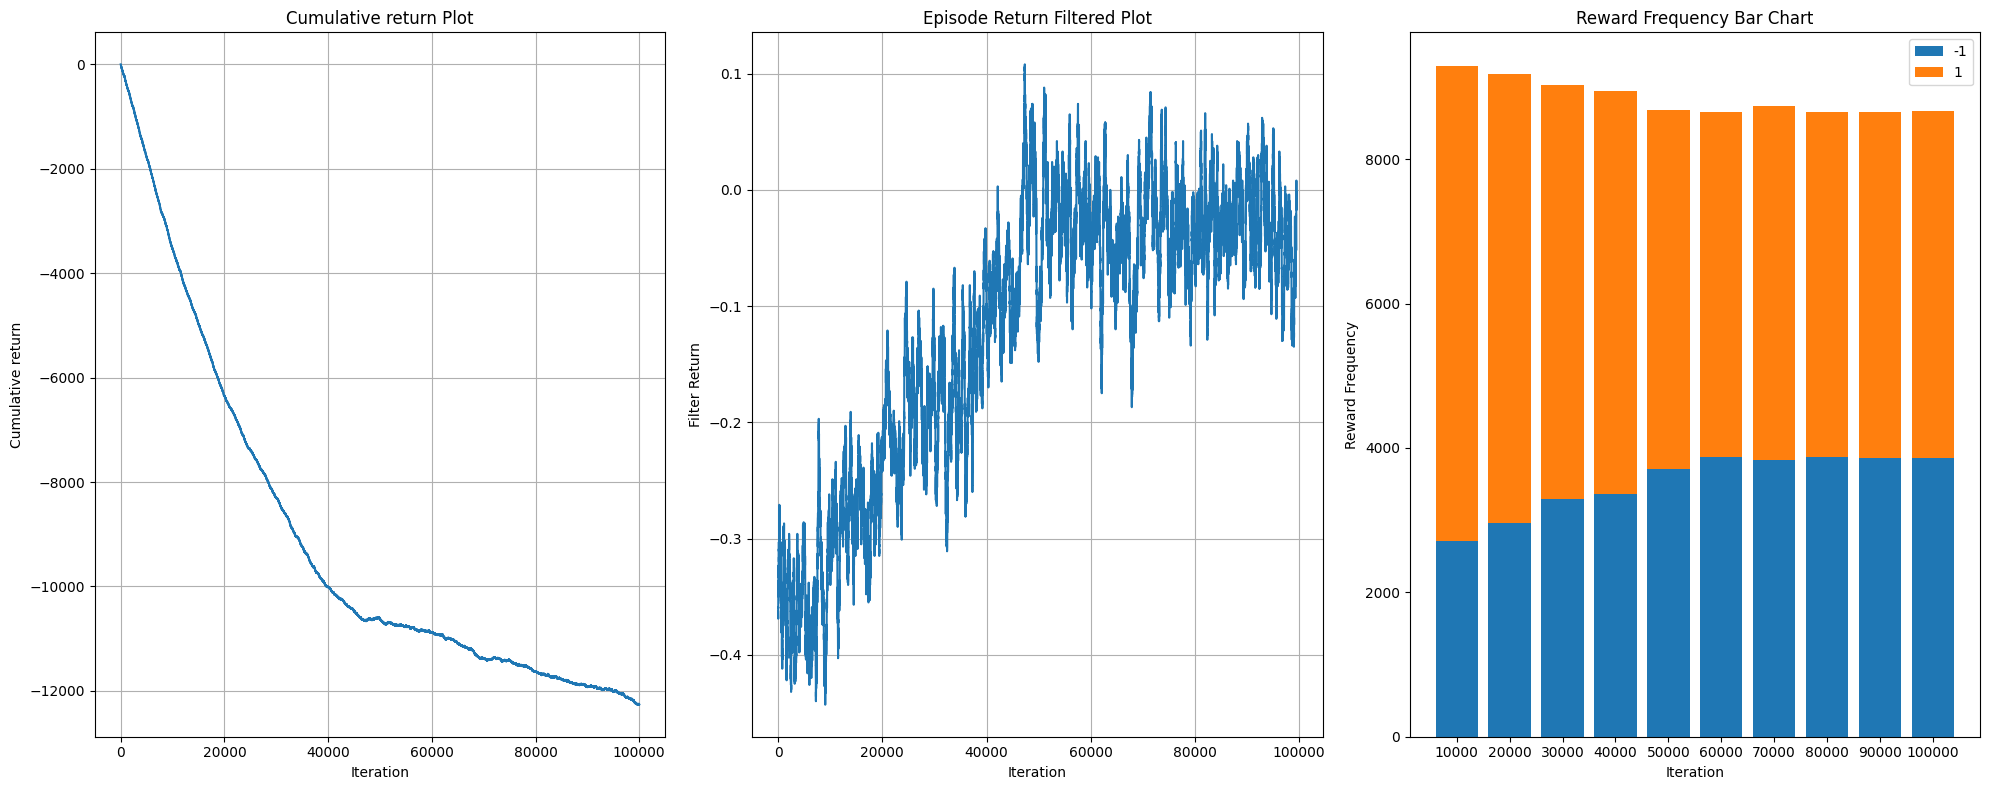

In [82]:
reward_plot(n_episodes, 10, env.return_queue)

## Testing Algorithm Performance After 100000 iterations training

Load Agent

In [83]:
#Load MC Agent

# hyperparameters
learning_rate = 0.01
n_episodes = 100000
start_epsilon = 0.0
epsilon_decay = start_epsilon / (n_episodes / 2)  # reduce the exploration over time
final_epsilon = 0.0
discount = 0.01

control_type = ControlType.MONTE_CARLO

agent = BlackJackAgent(
    control_type=control_type,
    learning_rate=learning_rate,
    initial_epsilon=start_epsilon,
    epsilon_decay=epsilon_decay,
    final_epsilon=final_epsilon,
    discount_factor=discount
)

full_path = os.path.abspath("q_value")
q_value_file = "monte_carlo.json"
agent.load_model(full_path, q_value_file)

defaultdict(<function blackjack.BlackJackAgent.__init__.<locals>.<lambda>()>,
            {(16, 10, 0): [-0.6384976525821597, -0.6150044590789095],
             (12, 10, 0): [-0.49289099526066343, -0.30484053561296576],
             (21, 10, 1): [1.2556713672593485, -0.0009986380090497733],
             (10, 10, 0): [-0.6397515527950308, -0.0012103518304576145],
             (13, 10, 0): [-0.5516483516483516, -0.39871754594620606],
             (16, 10, 1): [-0.5000000000000001, -0.002537486825775656],
             (14, 10, 0): [-0.5810810810810808, -0.44875509339622643],
             (15, 5, 0): [-0.16184971098265885, -0.5975814516129037],
             (15, 5, 1): [-0.6, 0.0004903846153846155],
             (18, 10, 0): [-0.2435390696260262, -0.7660311926605496],
             (14, 1, 0): [-0.81651376146789, -0.4885977620730271],
             (9, 10, 0): [-0.4307692307692306, -0.0025170534193548416],
             (15, 10, 0): [-0.6018099547511313, -0.544381190856089],
             (11,

In [84]:
# Testing MC

env = gym.make("Blackjack-v1", sab=False, natural=True)

env.observation_space.seed(20)
np.random.seed(20)

env = gym.wrappers.RecordEpisodeStatistics(env, deque_size=n_episodes)
for episode in tqdm(range(n_episodes)):
    obs, info = env.reset()

    done = False

    # play one episode
    while not done:
        action = agent.get_action(obs)
        next_obs, reward, terminated, truncated, info = env.step(action)

        agent.update(
            obs=obs,
            action=action,
            reward=reward,
            terminated=terminated
        )

        # update if the environment is done and the current obs
        done = terminated or truncated
        obs = next_obs

100%|██████████| 100000/100000 [00:19<00:00, 5092.18it/s]


## Visualizing the testing with MC Algorithm




====================== Reward Frequency ======================

Iteration[0:10000]     positive:0.3897 negative:0.481
Iteration[10000:20000]     positive:0.3882 negative:0.4797
Iteration[20000:30000]     positive:0.3818 negative:0.4831
Iteration[30000:40000]     positive:0.3857 negative:0.4798
Iteration[40000:50000]     positive:0.387 negative:0.4853
Iteration[50000:60000]     positive:0.3961 negative:0.4706
Iteration[60000:70000]     positive:0.3833 negative:0.4837
Iteration[70000:80000]     positive:0.3802 negative:0.4838
Iteration[80000:90000]     positive:0.3996 negative:0.4699
Iteration[90000:100000]     positive:0.39 negative:0.4807

====================== Reward Frequency ======================


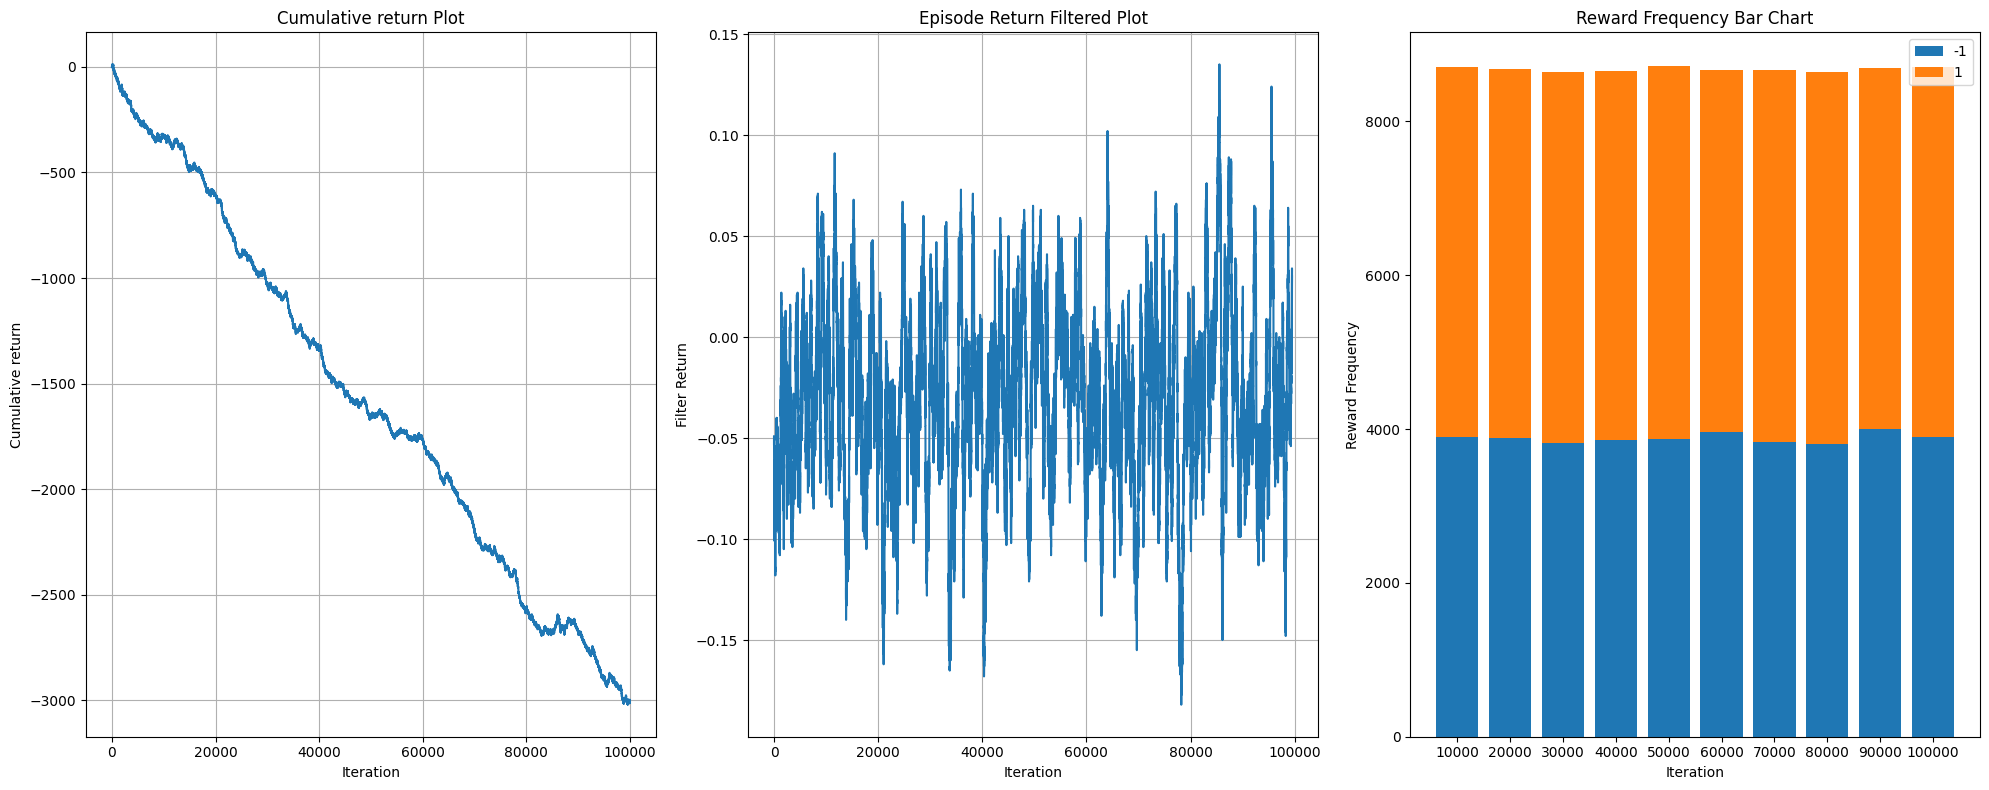

In [85]:
reward_plot(n_episodes, 10, env.return_queue)

## TD Control

## Parameters Studies for SARSA Algorithm

Discount 

In [86]:
#Discount Hyper Paramter Studied

Expected_Return_ls = []
discount_step = 0.01
discount_ls = np.arange(0,1,discount_step)

for i in  discount_ls:
    # hyperparameters
    learning_rate = 0.01
    n_episodes = 10000
    start_epsilon = 1.0
    epsilon_decay = start_epsilon / (n_episodes / 2)  # reduce the exploration over time
    final_epsilon = 0.01
    discount = i

    control_type = ControlType.TEMPORAL_DIFFERENCE

    agent = BlackJackAgent(
        control_type=control_type,
        learning_rate=learning_rate,
        initial_epsilon=start_epsilon,
        epsilon_decay=epsilon_decay,
        final_epsilon=final_epsilon,
        discount_factor=discount
    )

    env = gym.make("Blackjack-v1", sab=False, natural=True)

    env.observation_space.seed(20)
    np.random.seed(20)

    Expected_Return = 0
    count = 1

    env = gym.wrappers.RecordEpisodeStatistics(env, deque_size=n_episodes)
    for episode in tqdm(range(n_episodes)):
        obs, info = env.reset()
        done = False

        # Choose a from s using policy derived from Q
        action = agent.get_action(obs)

        # play one episode
        while not done:
            next_obs, reward, terminated, truncated, info = env.step(action)
            new_action = agent.get_action(next_obs)
            agent.update(
                obs=obs,
                action=action,
                reward=reward,
                terminated=terminated
            )

            # update if the environment is done and the current obs
            done = terminated or truncated
            obs = next_obs
            action = new_action

        agent.decay_epsilon()

    Expected_Return = (np.array(env.return_queue).flatten().sum())/len(np.array(env.return_queue).flatten())
    Expected_Return_ls.append(Expected_Return)

# Generating x values
x = np.arange(len(Expected_Return_ls))

# Performing polynomial fit
degree = 1  # Adjust the degree of the polynomial as needed
coefficients = np.polyfit(x, Expected_Return_ls, degree)
polynomial = np.poly1d(coefficients)

# Generating y values for the polynomial
y_fit = polynomial(x)

plt.plot(Expected_Return_ls)
plt.plot(x, y_fit, label='Polynomial Fit')
plt.xlabel('Discount (Step:0.01)')
plt.ylabel('Average Expected Return')
plt.title('Discount studies with step {} on SARSA Algorithm'.format(discount_step))
plt.grid(True)
plt.show()

 48%|████▊     | 4847/10000 [00:01<00:01, 4699.75it/s]


KeyboardInterrupt: 

Epsilon

 29%|██▊       | 2873/10000 [00:00<00:01, 4818.07it/s]

100%|██████████| 10000/10000 [00:02<00:00, 4683.32it/s]


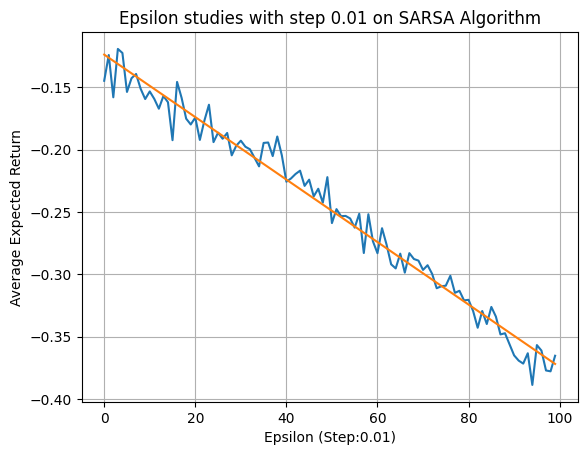

In [ ]:
#Epsilon Hyper Paramter Studied
Expected_Return_ls = []
epsilon_step = 0.01
epsilon_ls = np.arange(0,1,discount_step)

for i in  epsilon_ls:
    # hyperparameters
    learning_rate = 0.01
    n_episodes = 10000
    start_epsilon = 1.0
    epsilon_decay = start_epsilon / (n_episodes / 2)  # reduce the exploration over time
    final_epsilon = i
    discount = 0.01

    control_type = ControlType.TEMPORAL_DIFFERENCE

    agent = BlackJackAgent(
        control_type=control_type,
        learning_rate=learning_rate,
        initial_epsilon=start_epsilon,
        epsilon_decay=epsilon_decay,
        final_epsilon=final_epsilon,
        discount_factor=discount
    )

    env = gym.make("Blackjack-v1", sab=False, natural=True)

    env.observation_space.seed(20)
    np.random.seed(20)

    Expected_Return = 0
    count = 1

    env = gym.wrappers.RecordEpisodeStatistics(env, deque_size=n_episodes)
    for episode in tqdm(range(n_episodes)):
        obs, info = env.reset()
        done = False

        # Choose a from s using policy derived from Q
        action = agent.get_action(obs)

        # play one episode
        while not done:
            next_obs, reward, terminated, truncated, info = env.step(action)
            new_action = agent.get_action(next_obs)
            agent.update(
                obs=obs,
                action=action,
                reward=reward,
                terminated=terminated
            )

            # update if the environment is done and the current obs
            done = terminated or truncated
            obs = next_obs
            action = new_action

        agent.decay_epsilon()

    Expected_Return = (np.array(env.return_queue).flatten().sum())/len(np.array(env.return_queue).flatten())
    Expected_Return_ls.append(Expected_Return)

# Generating x values
x = np.arange(len(Expected_Return_ls))

# Performing polynomial fit
degree = 1  # Adjust the degree of the polynomial as needed
coefficients = np.polyfit(x, Expected_Return_ls, degree)
polynomial = np.poly1d(coefficients)

# Generating y values for the polynomial
y_fit = polynomial(x)

plt.plot(Expected_Return_ls)
plt.plot(x, y_fit, label='Polynomial Fit')
plt.xlabel('Epsilon (Step:0.01)')
plt.ylabel('Average Expected Return')
plt.title('Epsilon studies with step {} on SARSA Algorithm'.format(epsilon_step))
plt.grid(True)
plt.show()

Learning Rate

100%|██████████| 10000/10000 [00:02<00:00, 4938.83it/s]


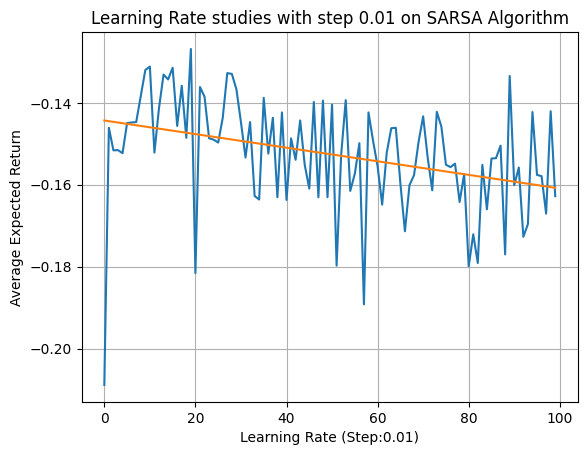

In [ ]:
#Learning Rate Hyper Paramter Studied
Expected_Return_ls = []
learning_rate_step = 0.01
learning_rate_ls = np.arange(0,1,discount_step)

for i in  learning_rate_ls:
    # hyperparameters
    learning_rate = i
    n_episodes = 10000
    start_epsilon = 1.0
    epsilon_decay = start_epsilon / (n_episodes / 2)  # reduce the exploration over time
    final_epsilon = 0.01
    discount = 0.01

    control_type = ControlType.TEMPORAL_DIFFERENCE

    agent = BlackJackAgent(
        control_type=control_type,
        learning_rate=learning_rate,
        initial_epsilon=start_epsilon,
        epsilon_decay=epsilon_decay,
        final_epsilon=final_epsilon,
        discount_factor=discount
    )

    env = gym.make("Blackjack-v1", sab=False, natural=True)

    env.observation_space.seed(20)
    np.random.seed(20)

    Expected_Return = 0
    count = 1

    env = gym.wrappers.RecordEpisodeStatistics(env, deque_size=n_episodes)
    for episode in tqdm(range(n_episodes)):
        obs, info = env.reset()
        done = False

        # Choose a from s using policy derived from Q
        action = agent.get_action(obs)

        # play one episode
        while not done:
            next_obs, reward, terminated, truncated, info = env.step(action)
            new_action = agent.get_action(next_obs)
            agent.update(
                obs=obs,
                action=action,
                reward=reward,
                terminated=terminated
            )

            # update if the environment is done and the current obs
            done = terminated or truncated
            obs = next_obs
            action = new_action

        agent.decay_epsilon()

    Expected_Return = (np.array(env.return_queue).flatten().sum())/len(np.array(env.return_queue).flatten())
    Expected_Return_ls.append(Expected_Return)

# Generating x values
x = np.arange(len(Expected_Return_ls))

# Performing polynomial fit
degree = 1  # Adjust the degree of the polynomial as needed
coefficients = np.polyfit(x, Expected_Return_ls, degree)
polynomial = np.poly1d(coefficients)

# Generating y values for the polynomial
y_fit = polynomial(x)

plt.plot(Expected_Return_ls)
plt.plot(x, y_fit, label='Polynomial Fit')
plt.xlabel('Learning Rate (Step:0.01)')
plt.ylabel('Average Expected Return')
plt.title('Learning Rate studies with step {} on SARSA Algorithm'.format(learning_rate_step))
plt.grid(True)
plt.show()

## Training Algorithm with 100000 training iterations 

In [87]:
#Training SARSA
# hyperparameters
learning_rate = 0.01
n_episodes = 100000
start_epsilon = 1.0
epsilon_decay = start_epsilon / (n_episodes / 2)  # reduce the exploration over time
final_epsilon = 0.001
discount = 0.01

control_type = ControlType.TEMPORAL_DIFFERENCE

agent = BlackJackAgent(
    control_type=control_type,
    learning_rate=learning_rate,
    initial_epsilon=start_epsilon,
    epsilon_decay=epsilon_decay,
    final_epsilon=final_epsilon,
    discount_factor=discount
)

env = gym.make("Blackjack-v1", sab=False, natural=True)

env.observation_space.seed(20)
np.random.seed(20)

env = gym.wrappers.RecordEpisodeStatistics(env, deque_size=n_episodes)
for episode in tqdm(range(n_episodes)):
    obs, info = env.reset()
    done = False

    # Choose a from s using policy derived from Q
    action = agent.get_action(obs)

    # play one episode
    while not done:
        next_obs, reward, terminated, truncated, info = env.step(action)
        new_action = agent.get_action(next_obs)
        agent.update(
            obs=obs,
            action=action,
            reward=reward,
            terminated=terminated
        )

        # update if the environment is done and the current obs
        done = terminated or truncated
        obs = next_obs
        action = new_action

    agent.decay_epsilon()

100%|██████████| 100000/100000 [00:21<00:00, 4624.71it/s]


Save Agent

In [88]:
#Save SARSA agent
q_value_file = "temporal_difference.json"
full_path = os.path.abspath("q_value")
agent.save_model(full_path, q_value_file)

## Visualizing the training with SARSA Algorithm

====================== Reward Frequency ======================

Iteration[0:10000]     positive:0.274 negative:0.6564
Iteration[10000:20000]     positive:0.2994 negative:0.6156
Iteration[20000:30000]     positive:0.3194 negative:0.5801
Iteration[30000:40000]     positive:0.3474 negative:0.5468
Iteration[40000:50000]     positive:0.3632 negative:0.5134
Iteration[50000:60000]     positive:0.3937 negative:0.4809
Iteration[60000:70000]     positive:0.3759 negative:0.49
Iteration[70000:80000]     positive:0.3725 negative:0.4947
Iteration[80000:90000]     positive:0.3773 negative:0.4921
Iteration[90000:100000]     positive:0.3876 negative:0.4768

====================== Reward Frequency ======================


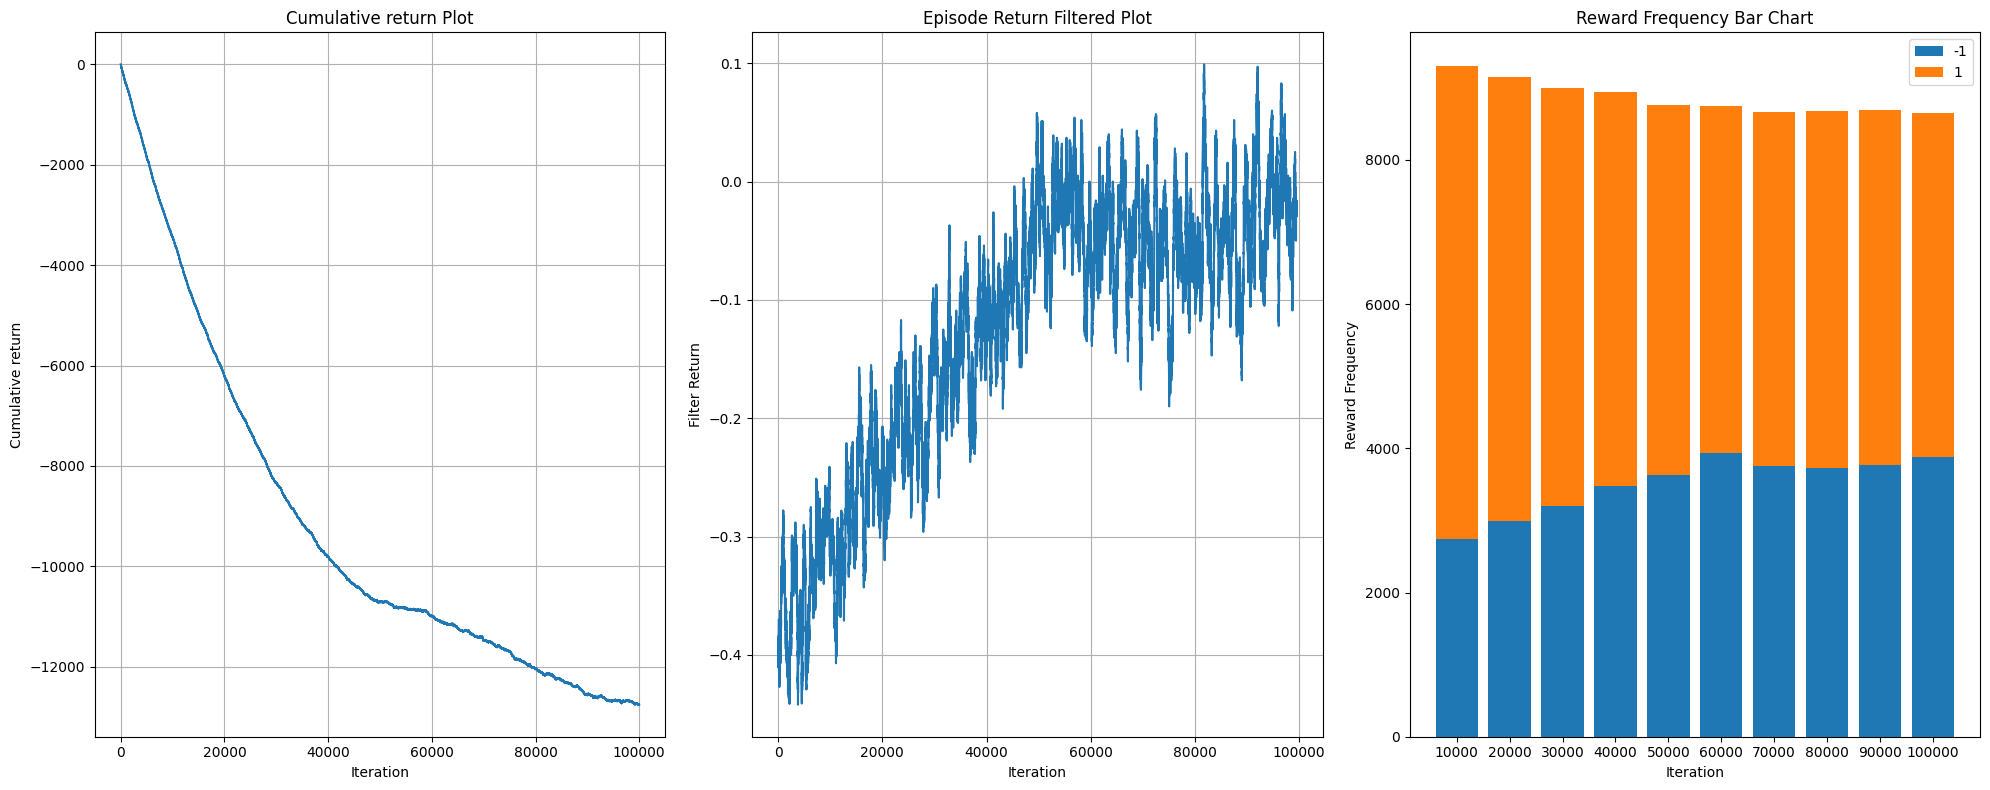

In [89]:
reward_plot(n_episodes, 10, env.return_queue)

Load Agent

In [90]:
#Load SARSA Agent

# hyperparameters
learning_rate = 0.01
n_episodes = 100000
start_epsilon = 0.0
epsilon_decay = start_epsilon / (n_episodes / 2)  # reduce the exploration over time
final_epsilon = 0.0
discount = 0.01

control_type = ControlType.TEMPORAL_DIFFERENCE

agent = BlackJackAgent(
    control_type=control_type,
    learning_rate=learning_rate,
    initial_epsilon=start_epsilon,
    epsilon_decay=epsilon_decay,
    final_epsilon=final_epsilon,
    discount_factor=discount
)

full_path = os.path.abspath("q_value")
q_value_file = "temporal_difference.json"
agent.load_model(full_path, q_value_file)

## Testing Algorithm Performance After 100000 iterations training

In [99]:
# Testing SARSA

env = gym.make("Blackjack-v1", sab=False, natural=True)

env.observation_space.seed(20)
np.random.seed(20)

env = gym.wrappers.RecordEpisodeStatistics(env, deque_size=n_episodes)
for episode in tqdm(range(n_episodes)):
    obs, info = env.reset()
    done = False

    # Choose a from s using policy derived from Q
    action = agent.get_action(obs)

    # play one episode
    while not done:
        next_obs, reward, terminated, truncated, info = env.step(action)
        next_action = agent.get_action(next_obs)

        agent.update(
            obs=obs,
            action=action,
            reward=reward,
            next_obs=next_obs,
            next_action=next_action,
            terminated=terminated
        )
        # update if the environment is done and the current obs
        done = terminated or truncated
        obs = next_obs
        action = new_action


100%|██████████| 100000/100000 [00:19<00:00, 5146.46it/s]


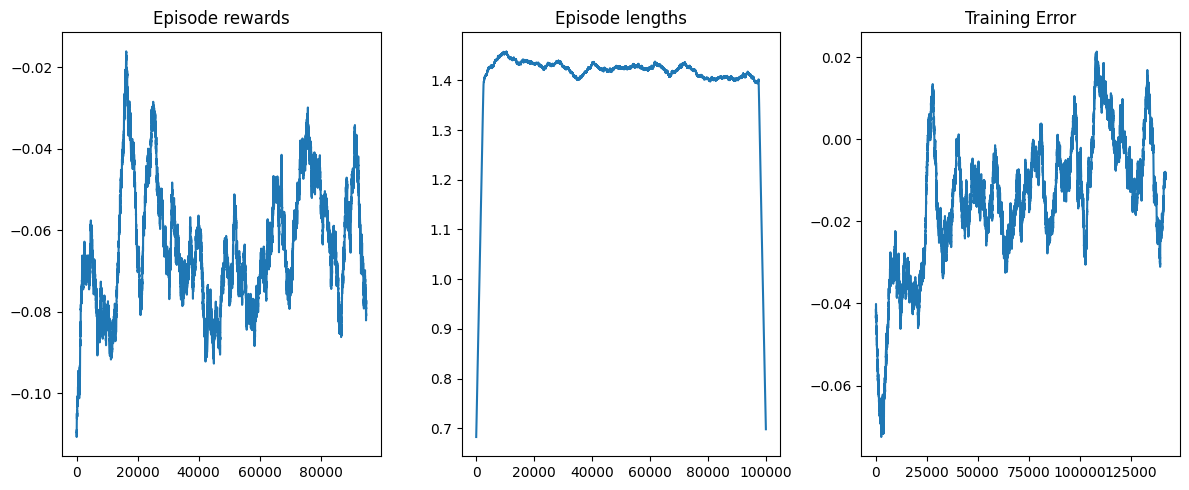

In [101]:
training_plot(env.return_queue, env.length_queue, agent.training_error, 5000)

## Visualizing the testing with SARSA Algorithm




====================== Reward Frequency ======================

Iteration[0:10000]     positive:0.3643 negative:0.5125
Iteration[10000:20000]     positive:0.3758 negative:0.5019
Iteration[20000:30000]     positive:0.384 negative:0.4952
Iteration[30000:40000]     positive:0.3721 negative:0.505
Iteration[40000:50000]     positive:0.3687 negative:0.5097
Iteration[50000:60000]     positive:0.3716 negative:0.5026
Iteration[60000:70000]     positive:0.373 negative:0.5005
Iteration[70000:80000]     positive:0.3804 negative:0.4982
Iteration[80000:90000]     positive:0.3857 negative:0.4971
Iteration[90000:100000]     positive:0.3764 negative:0.504

====================== Reward Frequency ======================


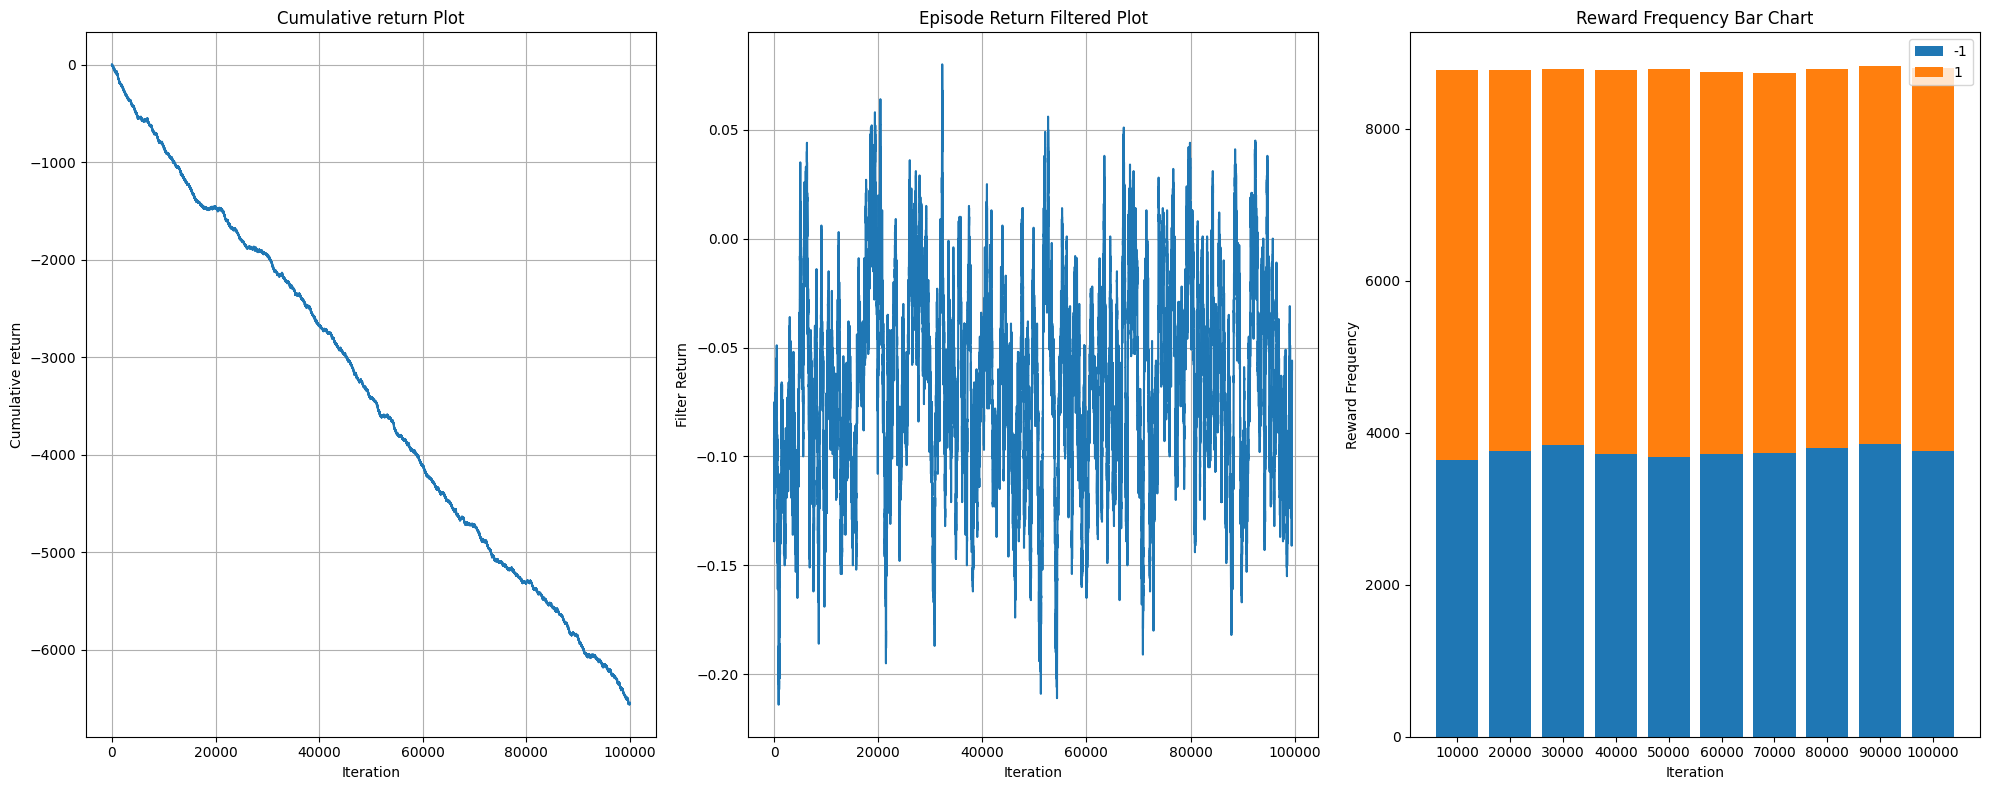

In [102]:
reward_plot(n_episodes, 10, env.return_queue)

## Visualizing the training




## Visualising the policy



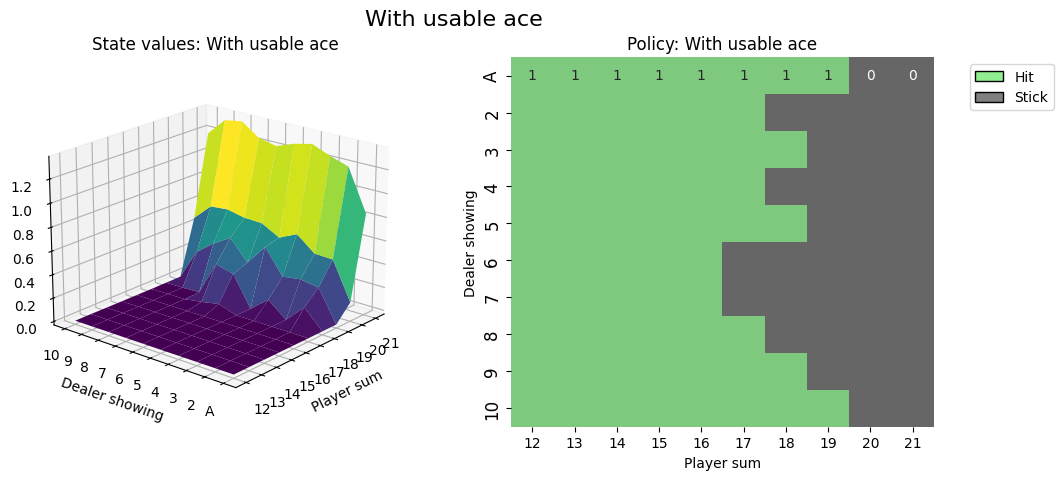

In [105]:
value_grid, policy_grid = create_grids(agent.q_values.items(), usable_ace=True)
fig1 = create_plots(value_grid, policy_grid, title="With usable ace")
plt.show()

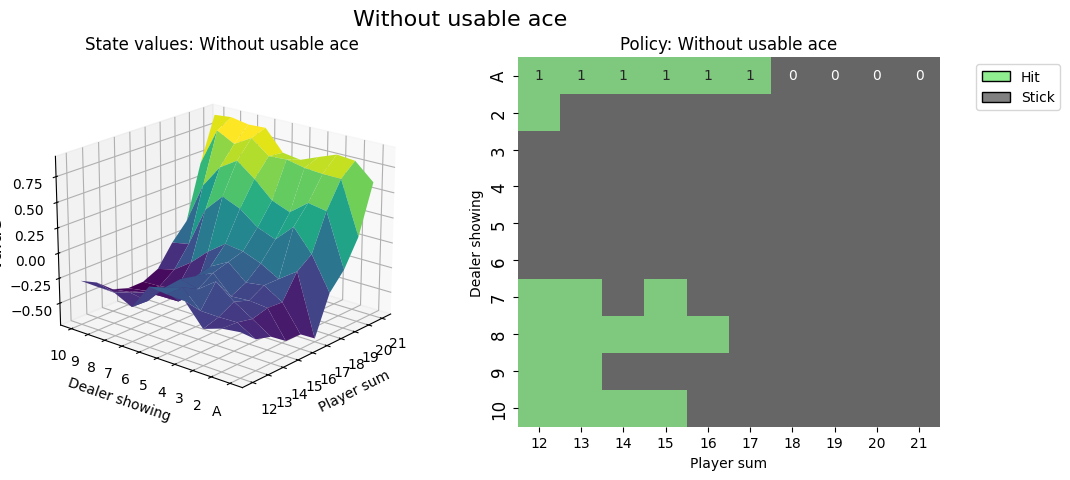

In [104]:
# state values & policy without usable ace (ace counts as 1)
value_grid, policy_grid = create_grids(agent.q_values.items(), usable_ace=False)
fig2 = create_plots(value_grid, policy_grid, title="Without usable ace")
plt.show()

# Double Q-Learning Control

## Parameters Studies for Double Q-Learning Algorithm

Discount 

 81%|████████▏ | 8132/10000 [00:01<00:00, 4909.71it/s]

100%|██████████| 10000/10000 [00:01<00:00, 5032.69it/s]


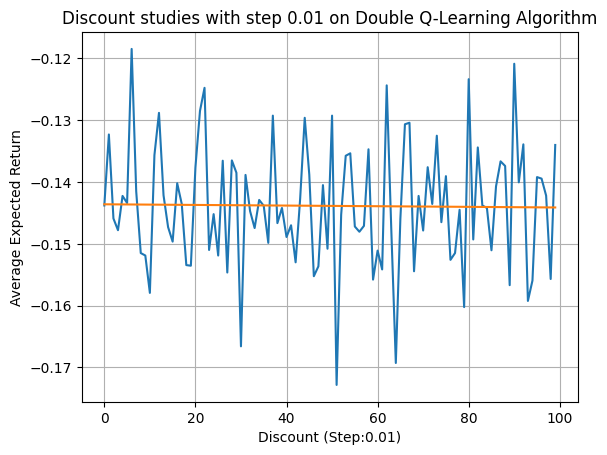

In [ ]:
#Discount Hyper Paramter Studied
Expected_Return_ls = []
discount_step = 0.01
discount_ls = np.arange(0,1,discount_step)

for i in  discount_ls:
    # hyperparameters
    learning_rate = 0.01
    n_episodes = 10000
    start_epsilon = 1.0
    epsilon_decay = start_epsilon / (n_episodes / 2)  # reduce the exploration over time
    final_epsilon = 0.01
    discount = i

    control_type == ControlType.DOUBLE_Q_LEARNING

    agent = BlackJackAgent(
        control_type=control_type,
        learning_rate=learning_rate,
        initial_epsilon=start_epsilon,
        epsilon_decay=epsilon_decay,
        final_epsilon=final_epsilon,
        discount_factor=discount
    )

    env = gym.make("Blackjack-v1", sab=False, natural=True)

    env.observation_space.seed(20)
    np.random.seed(20)

    Expected_Return = 0
    count = 1

    env = gym.wrappers.RecordEpisodeStatistics(env, deque_size=n_episodes)
    for episode in tqdm(range(n_episodes)):
        obs, info = env.reset()
        done = False

        # play one episode
        while not done:
            action = agent.get_action(obs)
            next_obs, reward, terminated, truncated, info = env.step(action)
            agent.update(
                obs=obs,
                action=action,
                reward=reward,
                next_obs=next_obs,
                terminated=terminated
            )

            # update if the environment is done and the current obs
            done = terminated or truncated
            obs = next_obs

        agent.decay_epsilon()

    Expected_Return = (np.array(env.return_queue).flatten().sum())/len(np.array(env.return_queue).flatten())
    Expected_Return_ls.append(Expected_Return)


# Generating x values
x = np.arange(len(Expected_Return_ls))

# Performing polynomial fit
degree = 1  # Adjust the degree of the polynomial as needed
coefficients = np.polyfit(x, Expected_Return_ls, degree)
polynomial = np.poly1d(coefficients)

# Generating y values for the polynomial
y_fit = polynomial(x)

plt.plot(Expected_Return_ls)
plt.plot(x, y_fit, label='Polynomial Fit')
plt.xlabel('Discount (Step:0.01)')
plt.ylabel('Average Expected Return')
plt.title('Discount studies with step {} on Double Q-Learning Algorithm'.format(discount_step))
plt.grid(True)
plt.show()
    

Epsilon

 28%|██▊       | 2769/10000 [00:00<00:01, 4552.23it/s]

100%|██████████| 10000/10000 [00:02<00:00, 4980.86it/s]


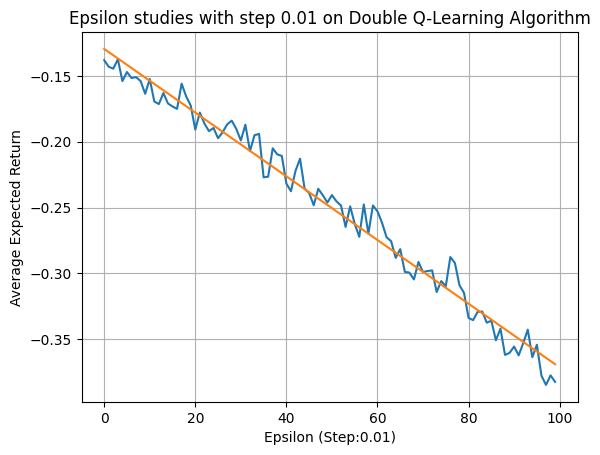

In [ ]:
#Epsilon Hyper Paramter Studied
Expected_Return_ls = []
epsilon_step = 0.01
epsilon_ls = np.arange(0,1,discount_step)

for i in  epsilon_ls:
    # hyperparameters
    learning_rate = 0.01
    n_episodes = 10000
    start_epsilon = 1.0
    epsilon_decay = start_epsilon / (n_episodes / 2)  # reduce the exploration over time
    final_epsilon = i
    discount = 0.01

    control_type == ControlType.DOUBLE_Q_LEARNING

    agent = BlackJackAgent(
        control_type=control_type,
        learning_rate=learning_rate,
        initial_epsilon=start_epsilon,
        epsilon_decay=epsilon_decay,
        final_epsilon=final_epsilon,
        discount_factor=discount
    )

    env = gym.make("Blackjack-v1", sab=False, natural=True)

    env.observation_space.seed(20)
    np.random.seed(20)

    Expected_Return = 0
    count = 1

    env = gym.wrappers.RecordEpisodeStatistics(env, deque_size=n_episodes)
    for episode in tqdm(range(n_episodes)):
        obs, info = env.reset()
        done = False

        # play one episode
        while not done:
            action = agent.get_action(obs)
            next_obs, reward, terminated, truncated, info = env.step(action)
            agent.update(
                obs=obs,
                action=action,
                reward=reward,
                next_obs=next_obs,
                terminated=terminated
            )

            # update if the environment is done and the current obs
            done = terminated or truncated
            obs = next_obs

        agent.decay_epsilon()

    Expected_Return = (np.array(env.return_queue).flatten().sum())/len(np.array(env.return_queue).flatten())
    Expected_Return_ls.append(Expected_Return)

# Generating x values
x = np.arange(len(Expected_Return_ls))

# Performing polynomial fit
degree = 1  # Adjust the degree of the polynomial as needed
coefficients = np.polyfit(x, Expected_Return_ls, degree)
polynomial = np.poly1d(coefficients)

# Generating y values for the polynomial
y_fit = polynomial(x)

plt.plot(Expected_Return_ls)
plt.plot(x, y_fit, label='Polynomial Fit')
plt.xlabel('Epsilon (Step:0.01)')
plt.ylabel('Average Expected Return')
plt.title('Epsilon studies with step {} on Double Q-Learning Algorithm'.format(epsilon_step))
plt.grid(True)
plt.show()

Learning Rate

100%|██████████| 10000/10000 [00:02<00:00, 4964.89it/s]


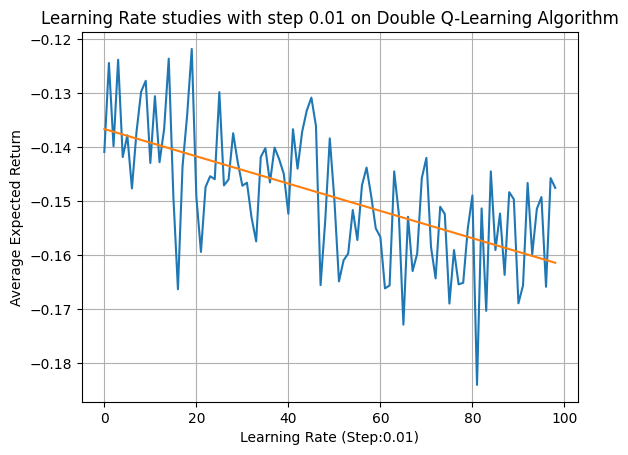

In [ ]:
#Learning Rate Hyper Paramter Studied
Expected_Return_ls = []
learning_rate_step = 0.01
learning_rate_ls = np.arange(learning_rate_step,1,discount_step)

for i in  learning_rate_ls:
    # hyperparameters
    learning_rate = i
    n_episodes = 10000
    start_epsilon = 1.0
    epsilon_decay = start_epsilon / (n_episodes / 2)  # reduce the exploration over time
    final_epsilon = 0.01
    discount = 0.01

    control_type == ControlType.DOUBLE_Q_LEARNING

    agent = BlackJackAgent(
        control_type=control_type,
        learning_rate=learning_rate,
        initial_epsilon=start_epsilon,
        epsilon_decay=epsilon_decay,
        final_epsilon=final_epsilon,
        discount_factor=discount
    )

    env = gym.make("Blackjack-v1", sab=False, natural=True)

    env.observation_space.seed(20)
    np.random.seed(20)

    Expected_Return = 0
    count = 1

    env = gym.wrappers.RecordEpisodeStatistics(env, deque_size=n_episodes)
    for episode in tqdm(range(n_episodes)):
        obs, info = env.reset()
        done = False

        # play one episode
        while not done:
            action = agent.get_action(obs)
            next_obs, reward, terminated, truncated, info = env.step(action)
            agent.update(
                obs=obs,
                action=action,
                reward=reward,
                next_obs=next_obs,
                terminated=terminated
            )

            # update if the environment is done and the current obs
            done = terminated or truncated
            obs = next_obs

        agent.decay_epsilon()

    Expected_Return = (np.array(env.return_queue).flatten().sum())/len(np.array(env.return_queue).flatten())
    Expected_Return_ls.append(Expected_Return)


# Generating x values
x = np.arange(len(Expected_Return_ls))

# Performing polynomial fit
degree = 1  # Adjust the degree of the polynomial as needed
coefficients = np.polyfit(x, Expected_Return_ls, degree)
polynomial = np.poly1d(coefficients)

# Generating y values for the polynomial
y_fit = polynomial(x)

plt.plot(Expected_Return_ls)
plt.plot(x, y_fit, label='Polynomial Fit')
plt.xlabel('Learning Rate (Step:0.01)')
plt.ylabel('Average Expected Return')
plt.title('Learning Rate studies with step {} on Double Q-Learning Algorithm'.format(learning_rate_step))
plt.grid(True)
plt.show()

## Training Algorithm with 100000 training iterations 

In [ ]:
#Training Double Q-Learning
# hyperparameters
learning_rate = 0.01
n_episodes = 100000
start_epsilon = 1.0
epsilon_decay = start_epsilon / (n_episodes / 2)  # reduce the exploration over time
final_epsilon = 0.001
discount = 0.01

control_type = ControlType.DOUBLE_Q_LEARNING

agent = BlackJackAgent(
    control_type=control_type,
    learning_rate=learning_rate,
    initial_epsilon=start_epsilon,
    epsilon_decay=epsilon_decay,
    final_epsilon=final_epsilon,
    discount_factor=discount
)

env = gym.make("Blackjack-v1", sab=False, natural=True)

env.observation_space.seed(20)
np.random.seed(20)

env = gym.wrappers.RecordEpisodeStatistics(env, deque_size=n_episodes)
for episode in tqdm(range(n_episodes)):
    obs, info = env.reset()
    done = False

    # play one episode
    while not done:
        action = agent.get_action(obs)
        next_obs, reward, terminated, truncated, info = env.step(action)
        agent.update(
            obs=obs,
            action=action,
            reward=reward,
            next_obs=next_obs,
            terminated=terminated
        )

        # update if the environment is done and the current obs
        done = terminated or truncated
        obs = next_obs

    agent.decay_epsilon()

100%|██████████| 100000/100000 [00:21<00:00, 4627.36it/s]


Save Agent

In [ ]:
#Save Double Q-Learning agent
q_value_file = "double_q_learning.json"
full_path = os.path.abspath("q_value")
agent.save_model(full_path, q_value_file)

## Visualizing the training with Double Q-Learning Algorithm

====================== Reward Frequency ======================

Iteration[0:10000]     positive:0.2669 negative:0.667
Iteration[10000:20000]     positive:0.2934 negative:0.6243
Iteration[20000:30000]     positive:0.3251 negative:0.5848
Iteration[30000:40000]     positive:0.3478 negative:0.543
Iteration[40000:50000]     positive:0.3687 negative:0.5119
Iteration[50000:60000]     positive:0.3875 negative:0.4785
Iteration[60000:70000]     positive:0.3865 negative:0.486
Iteration[70000:80000]     positive:0.3873 negative:0.4828
Iteration[80000:90000]     positive:0.3785 negative:0.4873
Iteration[90000:100000]     positive:0.3783 negative:0.4895

====================== Reward Frequency ======================


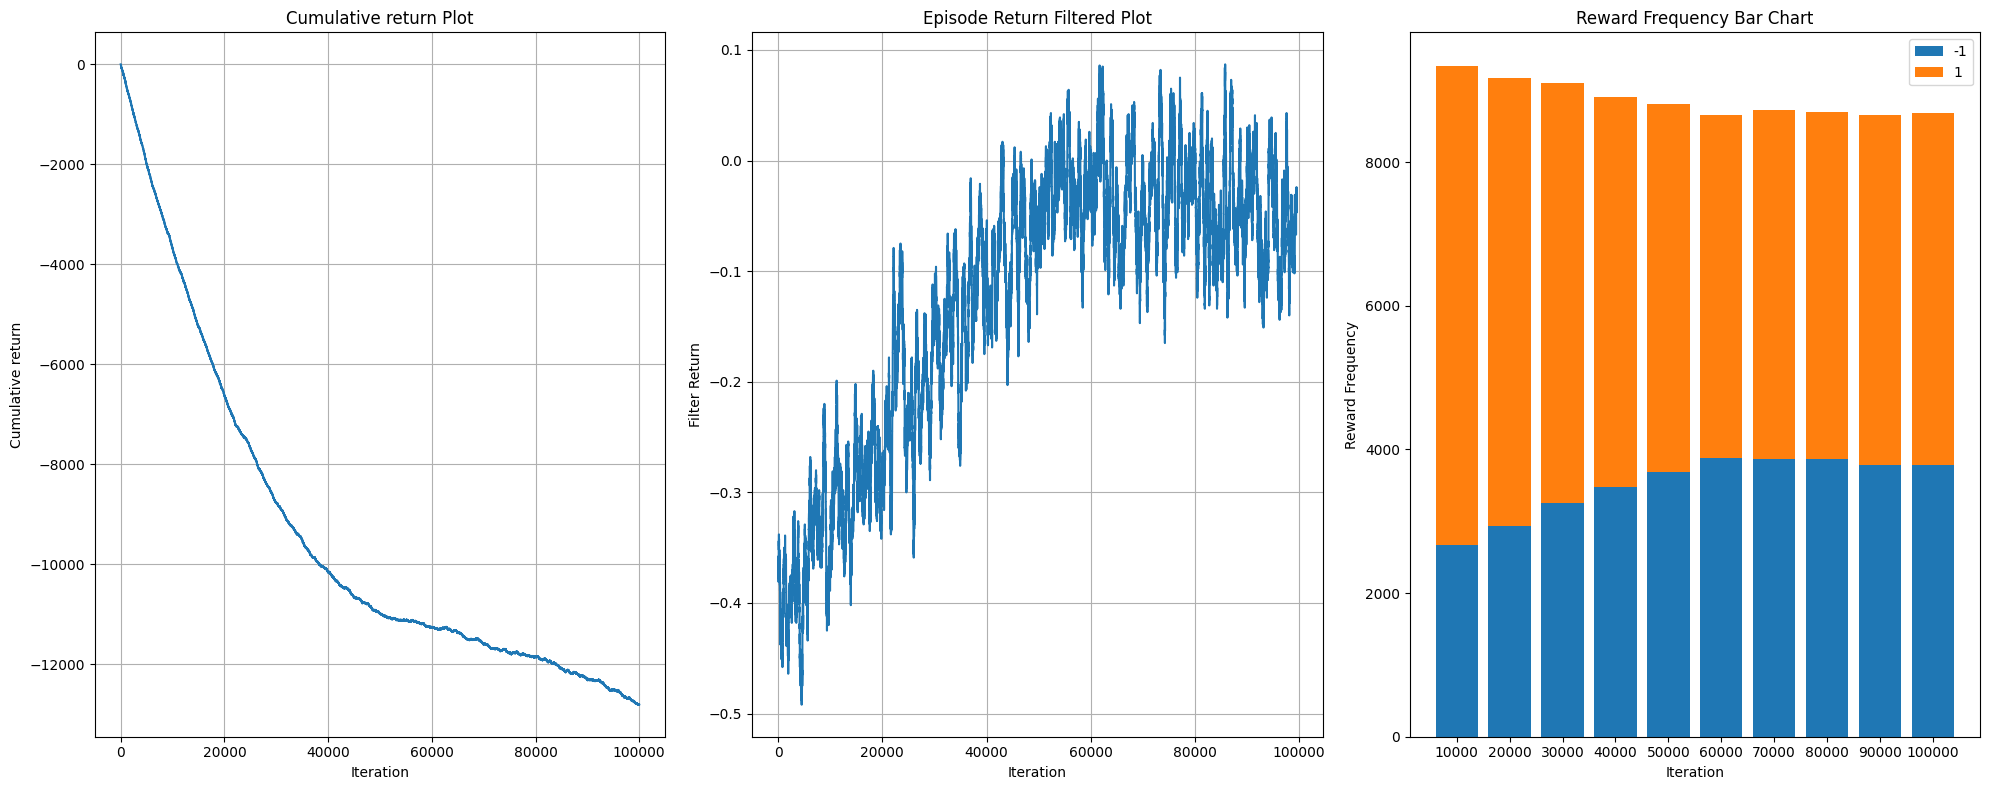

(array([ 1.00000e+00,  0.00000e+00, -1.00000e+00, ..., -1.27965e+04,
        -1.27955e+04, -1.27965e+04]),
 array([-0.366, -0.366, -0.366, ..., -0.039, -0.039, -0.043]))

In [ ]:
reward_plot(n_episodes, 10, env.return_queue)

## Testing Algorithm Performance After Double Q-Learning iterations training

Load Agent

In [ ]:
#Load Double Q-Learning Agent

# hyperparameters
learning_rate = 0.01
n_episodes = 100000
start_epsilon = 0.0
epsilon_decay = start_epsilon / (n_episodes / 2)  # reduce the exploration over time
final_epsilon = 0.0
discount = 0.01

control_type = ControlType.DOUBLE_Q_LEARNING

agent = BlackJackAgent(
    control_type=control_type,
    learning_rate=learning_rate,
    initial_epsilon=start_epsilon,
    epsilon_decay=epsilon_decay,
    final_epsilon=final_epsilon,
    discount_factor=discount
)

full_path = os.path.abspath("q_value")
q_value_file = "double_q_learning.json"
agent.load_model(full_path, q_value_file)

defaultdict(<function blackjack.BlackJackAgent.__init__.<locals>.<lambda>()>,
            {(14, 10, 1): [-0.18433351371461296, -0.002355532131535782],
             (21, 10, 1): [2.408436571009574, -0.0001256134460409062],
             (13, 1, 0): [-0.8578865828958018, -0.7858386582644002],
             (9, 3, 0): [-0.18130056171792425, 0.00039083081514029386],
             (21, 6, 1): [2.1474793574871294, -7.3038004196996105e-06],
             (17, 6, 0): [0.08791724282871981, -0.528233862982186],
             (13, 8, 1): [-0.08812477168904989, -0.00019486499931107784],
             (12, 8, 0): [-0.6923137402027155, -0.6296736411324075],
             (13, 8, 0): [-0.7273903130537585, -0.6971393486153781],
             (14, 10, 0): [-1.1085980746863546, -0.9676171040332299],
             (18, 9, 0): [-0.35702596291116506, -0.47405778532610743],
             (12, 1, 0): [-0.6736106214018499, -0.6190188484828645],
             (11, 1, 0): [-0.4078030789081113, -0.0016346417680384467],
   

In [ ]:
#Testing Double Q-Learning
env = gym.make("Blackjack-v1", sab=False, natural=True)

env.observation_space.seed(20)
np.random.seed(20)

env = gym.wrappers.RecordEpisodeStatistics(env, deque_size=n_episodes)
for episode in tqdm(range(n_episodes)):
    obs, info = env.reset()
    done = False

    # play one episode
    while not done:
        action = agent.get_action(obs)
        next_obs, reward, terminated, truncated, info = env.step(action)

        agent.update(
            obs=obs,
            action=action,
            reward=reward,
            next_obs=next_obs,
            terminated=terminated
        )

        # update if the environment is done and the current obs
        done = terminated or truncated
        obs = next_obs

100%|██████████| 100000/100000 [00:19<00:00, 5124.49it/s]


## Visualizing the testing with Double Q-Learning Algorithm




====================== Reward Frequency ======================

Iteration[0:10000]     positive:0.387 negative:0.4822
Iteration[10000:20000]     positive:0.3802 negative:0.4832
Iteration[20000:30000]     positive:0.3855 negative:0.4822
Iteration[30000:40000]     positive:0.376 negative:0.493
Iteration[40000:50000]     positive:0.3933 negative:0.4761
Iteration[50000:60000]     positive:0.3857 negative:0.49
Iteration[60000:70000]     positive:0.3823 negative:0.4884
Iteration[70000:80000]     positive:0.3859 negative:0.4887
Iteration[80000:90000]     positive:0.3909 negative:0.487
Iteration[90000:100000]     positive:0.3781 negative:0.4895

====================== Reward Frequency ======================


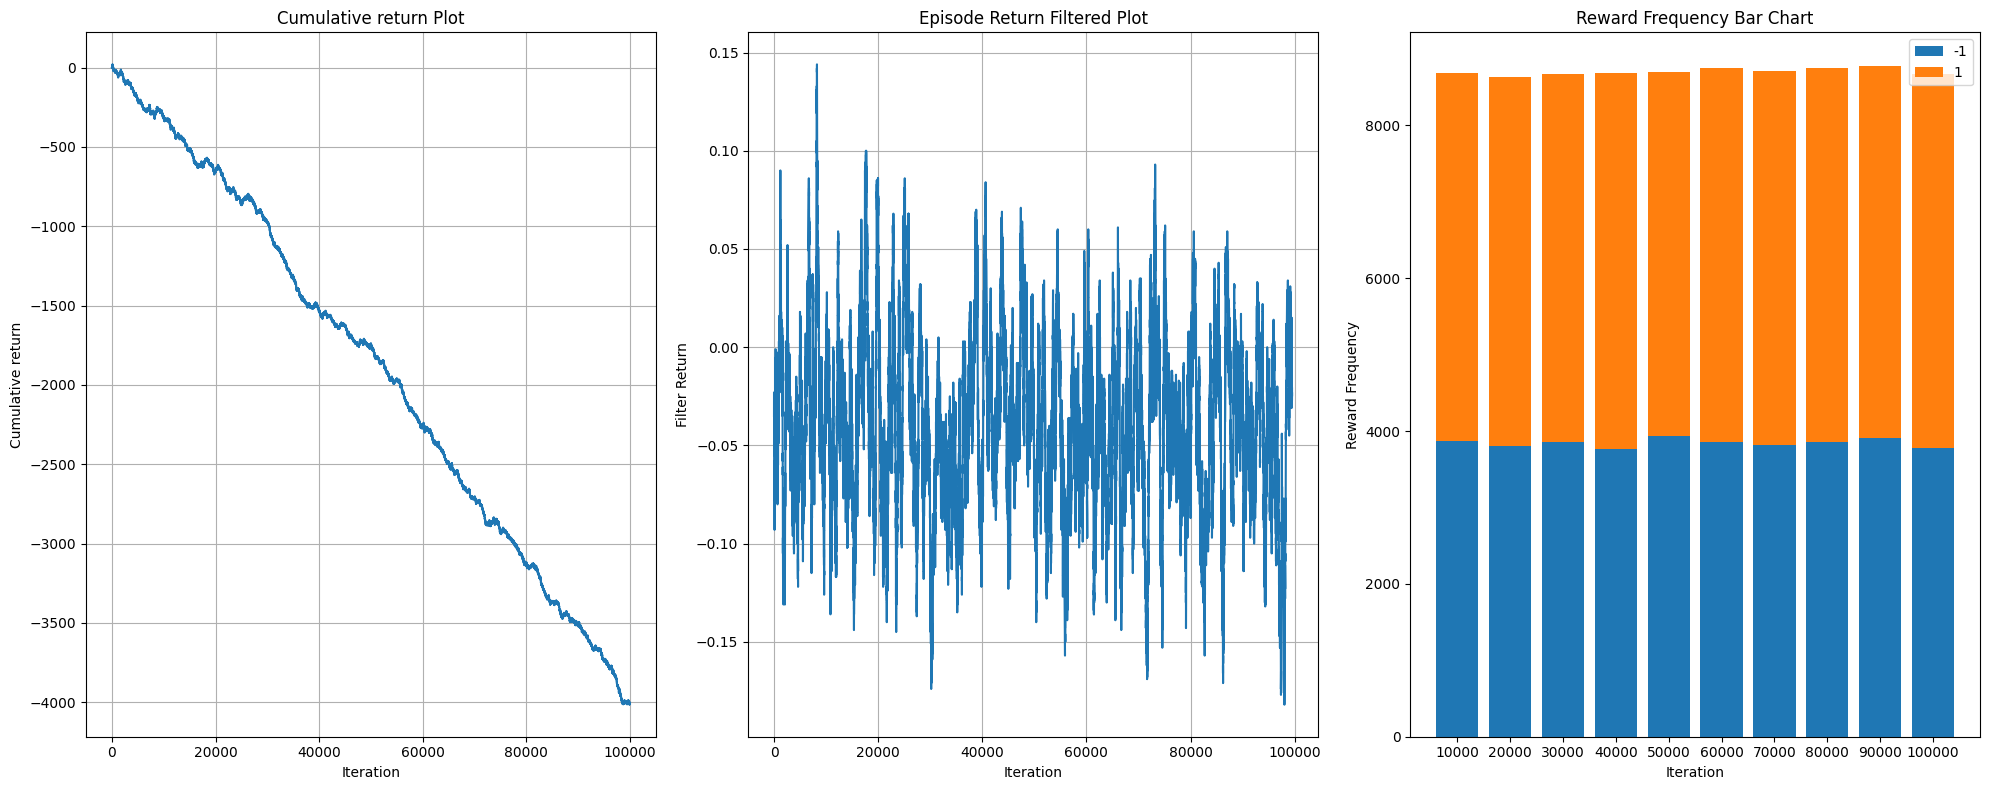

In [ ]:
reward_plot(n_episodes, 10, env.return_queue)

## Visualising the policy



<img src="file://_static/img/tutorials/blackjack_with_usable_ace.png">




In [ ]:
training_plot(env.return_queue, env.length_queue, agent.training_error, 5000)

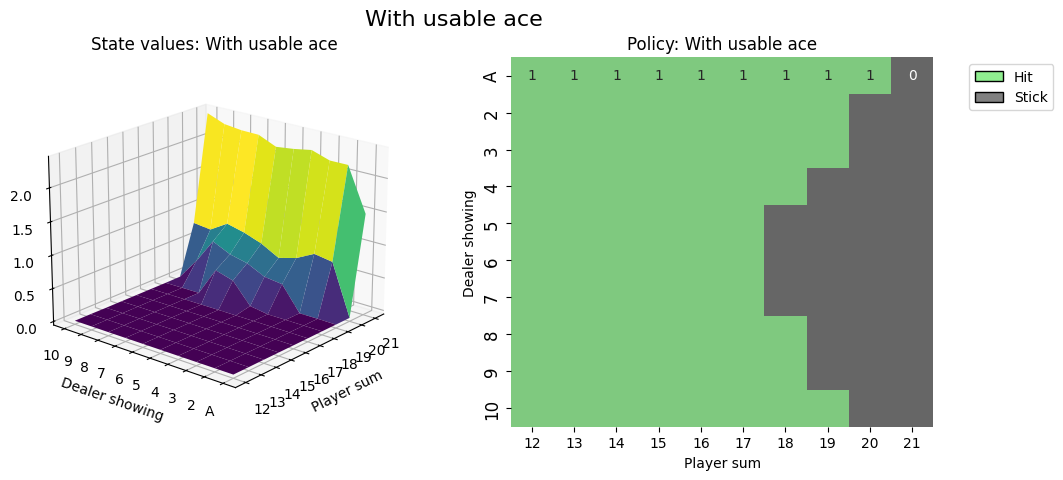

In [ ]:
# state values & policy with usable ace (ace counts as 11)
value_grid, policy_grid = create_grids(agent.q_values.items(), usable_ace=True)
fig1 = create_plots(value_grid, policy_grid, title="With usable ace")
plt.show()

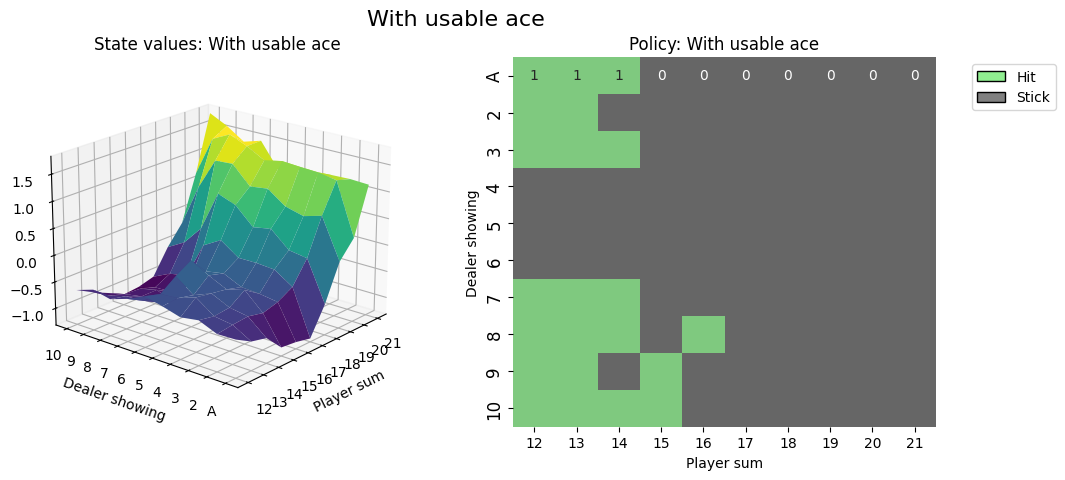

In [ ]:
# state values & policy without usable ace (ace counts as 1)
value_grid, policy_grid = create_grids(agent.q_values.items(), usable_ace=False)
fig1 = create_plots(value_grid, policy_grid, title="With usable ace")
plt.show()